# Praca domowa 5

***Renata Rólkiewicz***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Zbiór danych
Jest to zbiór danych w wymiarze $R^2$ . Obserwacje nie są przypisane do żadnej klasy. Zbiór zawiera 400 obserwacji.

In [2]:
data = pd.read_csv('clustering.csv', names=['x','y'])
data.head(10)

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
5,13.389996,-4.016202
6,-26.104987,8.618031
7,-15.625451,67.370573
8,85.259069,14.681990
9,33.039866,-49.611486


In [3]:
data.shape

(400, 2)

In [4]:
data.describe()

,x,y
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


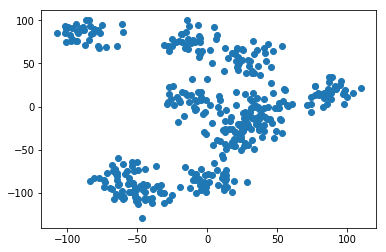

In [5]:
plt.scatter(data['x'], data['y'])

## 1.  Metoda k-means
Zaczynamy od jednego z najpopularniejszych modeli kombinatorycznych, czyli k-średnich. Do wyboru optymalnej liczby klastrów w tym przypadku wykorzystamy metodę łokcia.

In [6]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
    plt.title('K-means with '+ str(n_clusters) +' clusters')
    plt.show()

Sprawdźmy jak przykładowo wygląda to dla 5 klastrów:

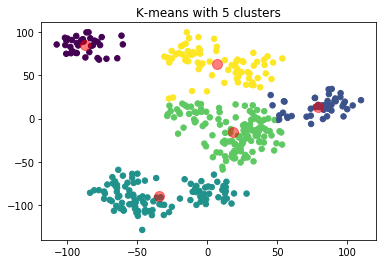

In [7]:
plot_kmeans_clusters(data, n_clusters=5)

### Wybór optymalnej liczby klastrów - metoda łokcia

In [8]:
def count_wcss_scores(data, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        wcss = kmeans.score(data) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

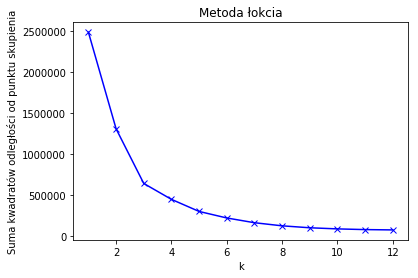

In [9]:
wcss_vec = count_wcss_scores(data, 12)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma kwadratów odległości od punktu skupienia')
plt.title('Metoda łokcia')
plt.show()

Jest to metoda subiektywna, wybór często nie jest oczywisty. W naszym przypadku możemy zauważyć, że optymalna liczba klastrów będzie z zakresu 8-10, jednak na pierwszy rzut oka nie jesteśmy w stanie ocenić, która z tych liczb będzie lepsza.

### Wyniki

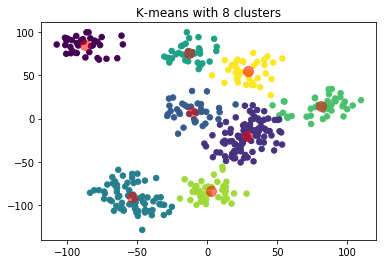

In [10]:
plot_kmeans_clusters(data, n_clusters=8)

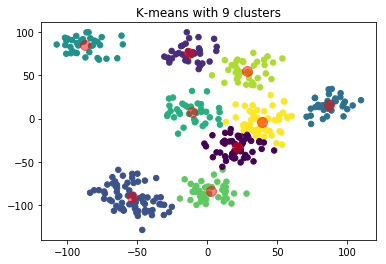

In [11]:
plot_kmeans_clusters(data, n_clusters=9)

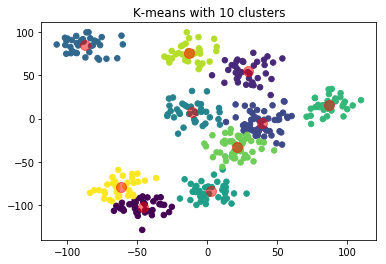

In [12]:
plot_kmeans_clusters(data, n_clusters=10)

## 2. Metoda hierarchiczna
Rozważymy metody aglomeracyjne z połączeniem Warda i połączeniem średnim. Do oceny optymalnej liczby klastrów użyjemy metryki Silhouette (im większa wartość tym lepiej).

In [13]:
from sklearn.cluster import AgglomerativeClustering
def plot_agglomerative_clusters(data, n_clusters, linkage):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agg.fit(data)
    y_agg = agg.fit_predict(data)
    plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y_agg, s=30, cmap='plasma')

    plt.title('Agglomerative clusters - '+linkage)
    plt.show()

Sprawdźmy jak przykładowo wygląda to dla 5 klastrów i połączenia Warda:

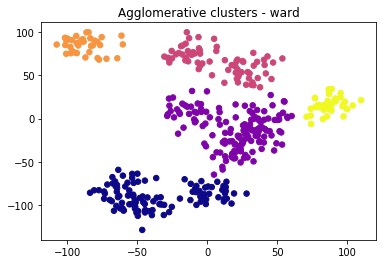

In [14]:
plot_agglomerative_clusters(data, 5, 'ward')

### Wybór optymalnej liczby klastrów - metoda Silhouette

In [15]:
from sklearn.metrics import silhouette_score

scores_average = []    
for k in range(2,15):
    labels = AgglomerativeClustering(n_clusters = k, linkage = 'average').fit_predict(data)
    score = silhouette_score(data,labels)
    scores_average.append(score)
    
scores_ward = []    
for k in range(2,15):
    labels = AgglomerativeClustering(n_clusters = k, linkage = 'ward').fit_predict(data)
    score = silhouette_score(data,labels)
    scores_ward.append(score)

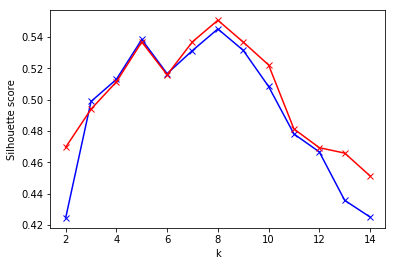

In [16]:
cluster_num_seq = range(2, 15)
plt.plot(cluster_num_seq, scores_average, 'bx-')
plt.plot(cluster_num_seq, scores_ward, 'bx-', color='red')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Zarówno dla połączenia Warda jak i połączenia średniego najwyższa wartość osiągana jest w 8, a zatem optymalna liczba klastrów to właśnie 8. Wysokie wartości obserwujemy także dla 6,7 oraz 9.

### Wyniki

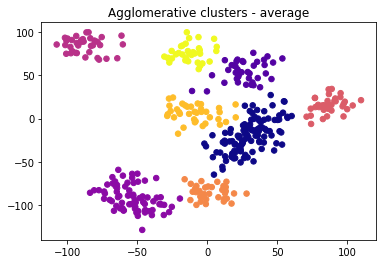

In [17]:
plot_agglomerative_clusters(data, n_clusters=8, linkage='average')

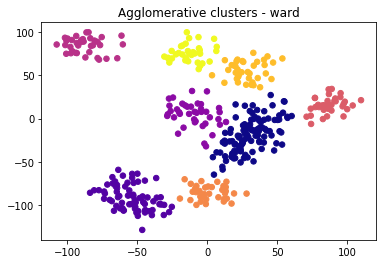

In [18]:
plot_agglomerative_clusters(data, n_clusters=8, linkage='ward')

## Podsumowanie

Wybór optymalnej liczby klastrów zależy od tego jakiego podziału oczekujemy. Bazując na metodzie łokcia i Silhouette wybór padł na 8. Zarówno dla metody k-means jak i aglomeracyjnej podziały są do siebie bardzo zbliżone.

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu *Wstęp do uczenia maszynowego* została wykonana przeze mnie samodzielnie.

*Renata Rólkiewicz, 298840*